grdimage [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdimage [WARNING]: w reset from -25 to -25.0011971487
grdimage [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdimage [WARNING]: e reset from -13 to -12.9989911094
grdimage [WARNING]: (s - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdimage [WARNING]: s reset from 63.2 to 63.1942135537
grdimage [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdimage [WARNING]: n reset from 66.7 to 66.7061712787


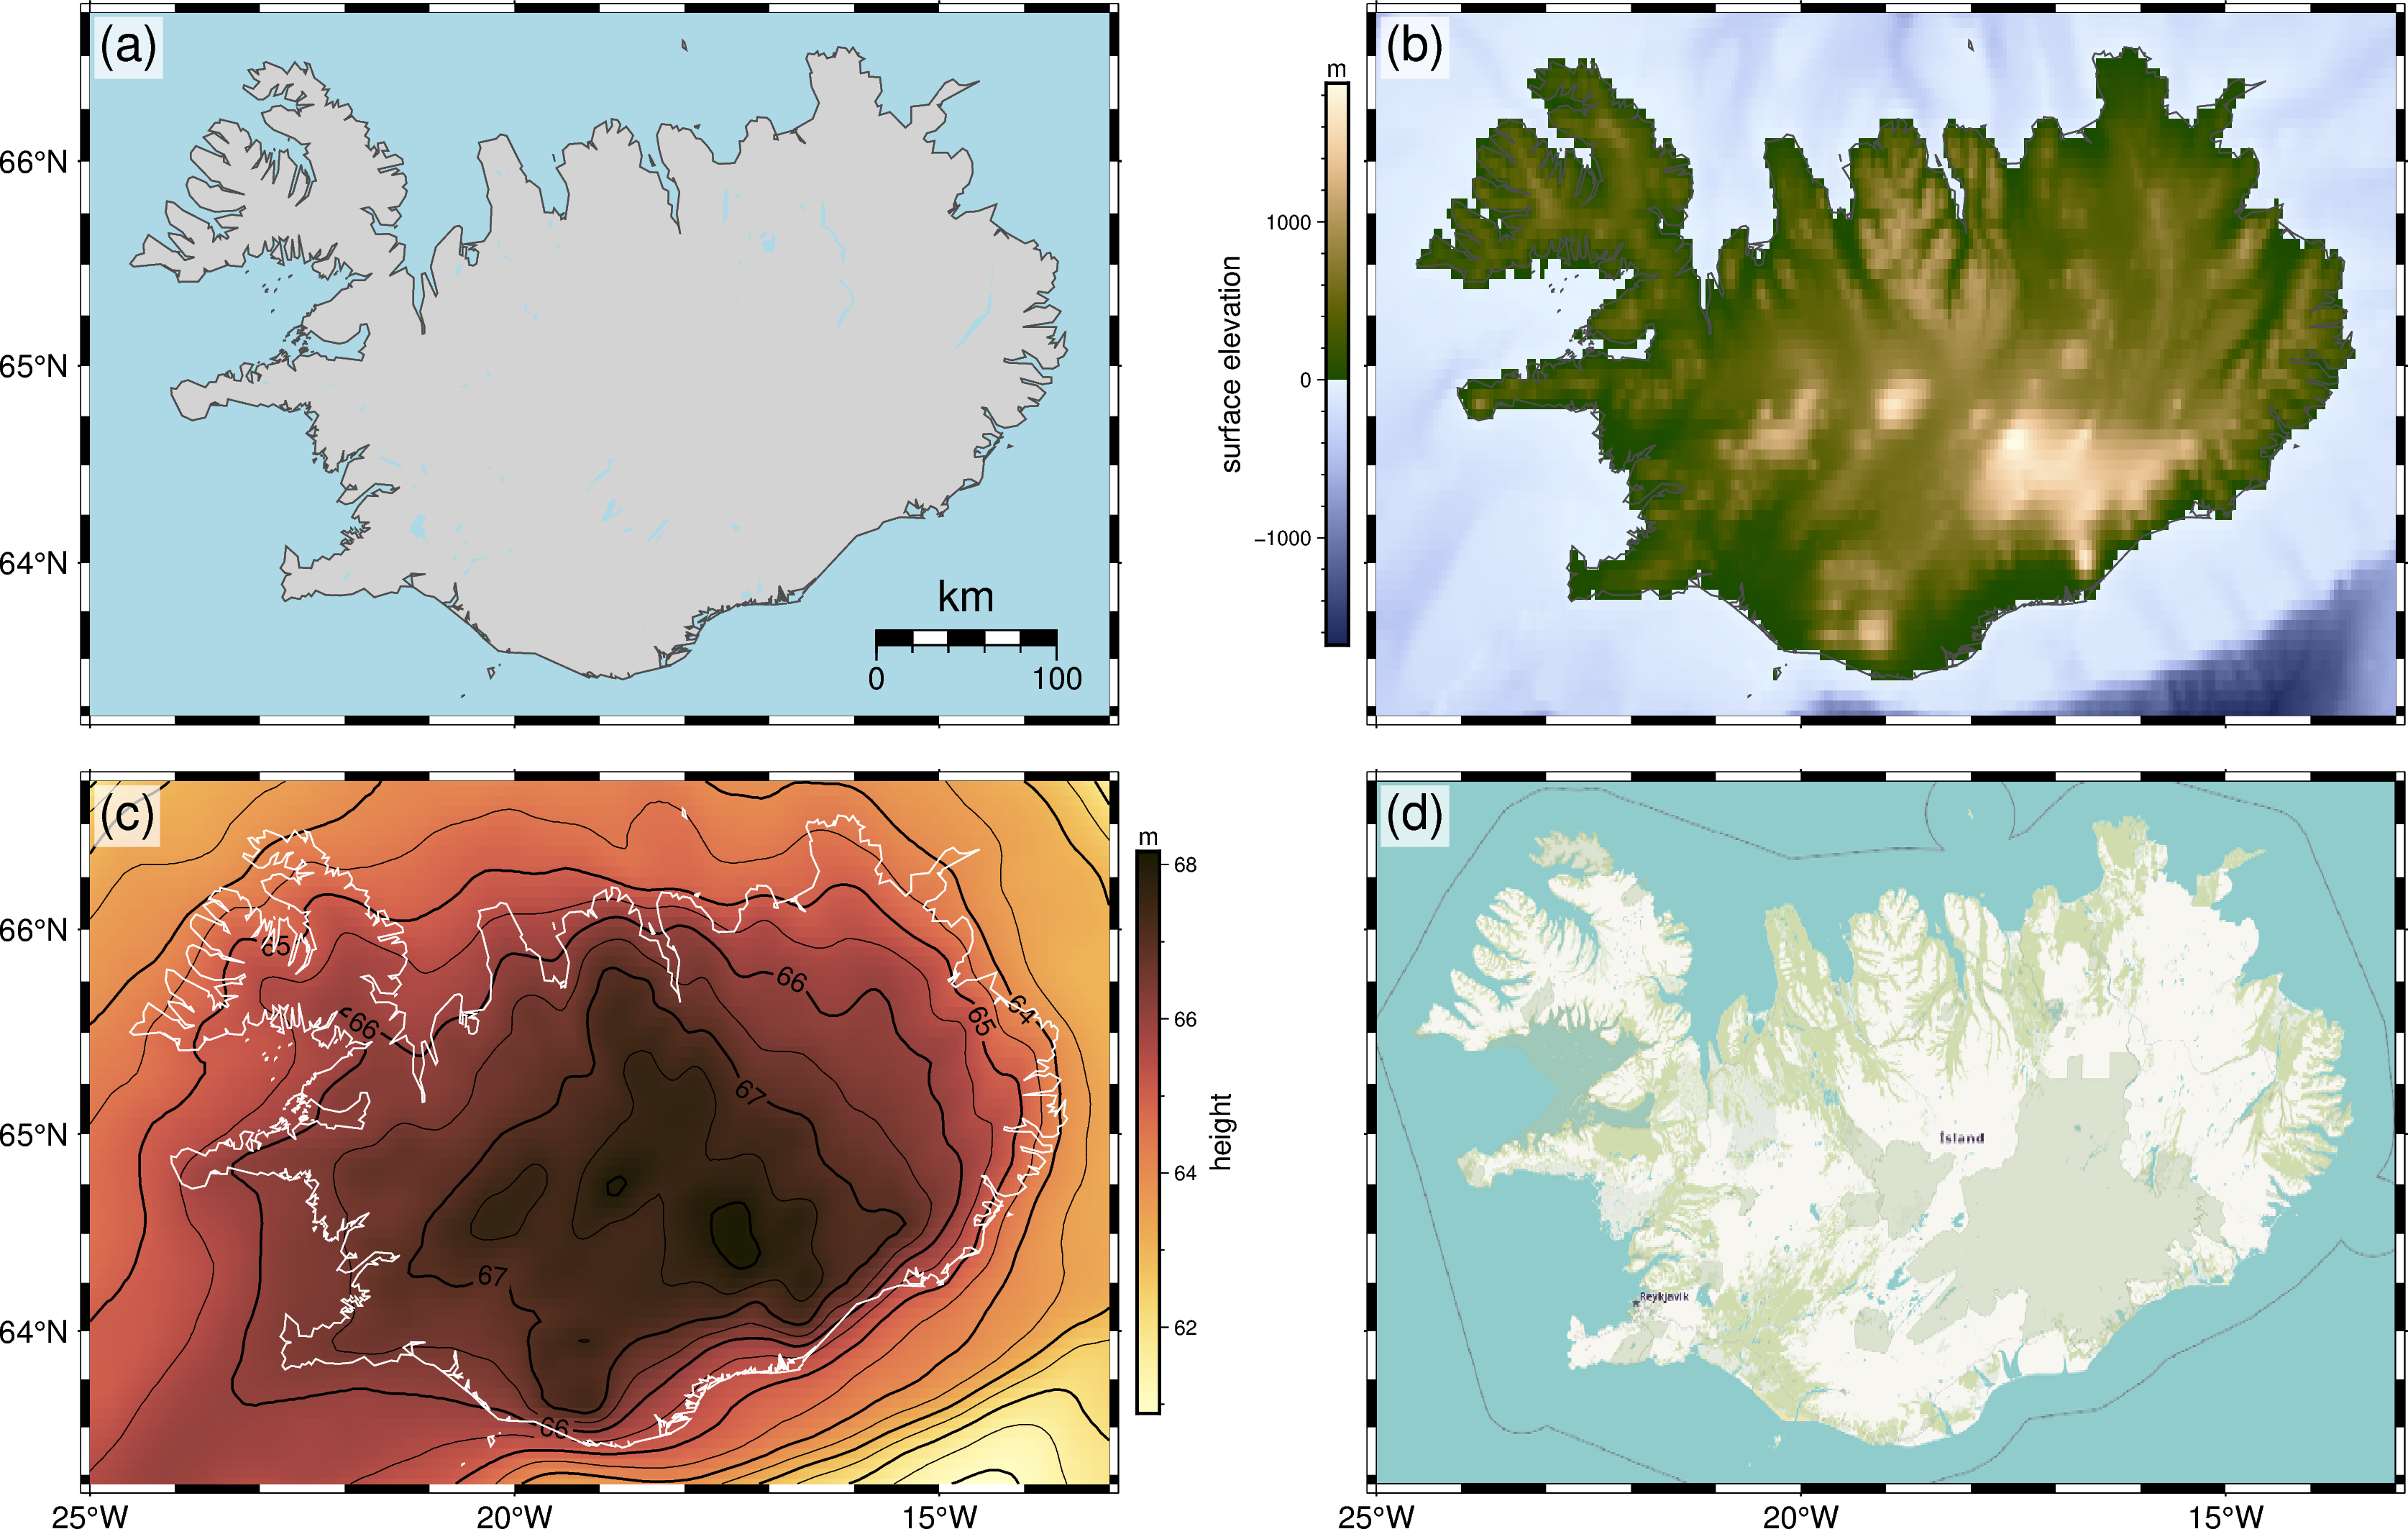

In [1]:
import pygmt

region = [-25, -13, 63.2, 66.7]

fig = pygmt.Figure()
with fig.subplot(
    nrows=2,
    ncols=2,
    subsize=("12c", "8.5c"),
    autolabel="(a)+o0.1c/0.25c+gwhite@30",
    margins=("1.5c", "0.2c"),
    sharex="b",
    sharey="l",
    frame="WSrt",
):

    # Top left
    fig.basemap(region=region, projection="M?", panel=True)
    fig.coast(land="lightgray", water="lightblue", shorelines="1/0.5p,gray30")
    with pygmt.config(MAP_SCALE_HEIGHT="10p"):
        fig.basemap(map_scale="n0.86/0.1+c+w100k+f+l")
    
    # Top right
    fig.basemap(region=region, projection="M?", panel=True)
    grid_relief = pygmt.datasets.load_earth_relief(resolution="03m", region=region)
    fig.grdimage(grid=grid_relief, cmap="SCM/oleron")
    fig.colorbar(frame=["x+lsurface elevation", "y+lm"], position="JLM")
    fig.coast(shorelines="1/0.5p,gray30")
    
    # Bottom left
    fig.basemap(region=region, projection="M?", panel=True)
    grid_geoid = pygmt.datasets.load_earth_geoid(resolution="03m", region=region)
    fig.grdimage(grid=grid_geoid, cmap="SCM/lajolla")
    fig.grdcontour(grid=grid_geoid)
    fig.colorbar(frame=["x+lheight", "y+lm"], position="JRM")
    fig.coast(shorelines="1/0.5p,white")
    
    # Bottom right
    fig.tilemap(region=region, projection="M?", zoom=7, panel=True)

fig.show()